<a href="https://colab.research.google.com/github/A01703130/Evaluacion/blob/main/Esp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     

In [16]:
#Convertir en dataframe
esp= pd.read_csv("Girona.csv", encoding="unicode_escape")
esp
     

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.455100e+04,https://www.airbnb.com/rooms/14551,2.023030e+13,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,57237,...,4.91,4.63,4.74,HUTG-049542,f,1,0,1,0,0.37
1,1.205757e+06,https://www.airbnb.com/rooms/1205757,2.023030e+13,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,6586355,...,4.91,4.69,4.80,NaN,f,1,0,1,0,0.51
2,1.212820e+06,https://www.airbnb.com/rooms/1212820,2.023030e+13,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,NaN,https://a0.muscache.com/pictures/18245529/0886...,6620645,...,4.76,4.74,4.32,NaN,f,2,2,0,0,0.62
3,7.516380e+05,https://www.airbnb.com/rooms/751638,2.023030e+13,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,3680160,...,5.00,4.63,4.50,PG000794,t,6,1,5,0,0.08
4,4.134200e+04,https://www.airbnb.com/rooms/41342,2.023030e+13,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,180072,...,4.73,4.91,4.36,HUTG-003688,f,1,1,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,8.583870e+17,https://www.airbnb.com/rooms/858386613168601750,2.023030e+13,01/04/2023,city scrape,"Casa La Chumbera, Begur, Costa Brava",Individual house located at the urbanization '...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,26281633,...,NaN,NaN,NaN,HUTG-001292,t,34,34,0,0,NaN
19651,8.583960e+17,https://www.airbnb.com/rooms/858396134121337855,2.023030e+13,01/04/2023,city scrape,Playa a 2 minutos,"MagnÃ­fico piso para pasar vacaciones,dispone ...",NaN,https://a0.muscache.com/pictures/6351279f-294b...,444428600,...,NaN,NaN,NaN,HUTG019727,t,1,1,0,0,NaN
19652,8.584110e+17,https://www.airbnb.com/rooms/858410917126332945,2.023030e+13,01/04/2023,city scrape,Apartamento cÃ©ntrico,"EstÃ¡ compuesto de dos habitaciones, una de ma...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,491503593,...,NaN,NaN,NaN,HUTG-057830,f,9,9,0,0,NaN
19653,8.584180e+17,https://www.airbnb.com/rooms/858418062773719271,2.023030e+13,01/04/2023,city scrape,"Apto a 5 min de la playa, Platja d'Aro",Cozy apartment for 4 people. Perfect to spend ...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,389605038,...,NaN,NaN,NaN,HUTG-065236,t,54,54,0,0,NaN


# Procesamiento de datos

Justificación: Se determinó que los valores nulos del dataframe se sustituirían por el promedio de los valores de cada columa. Esto solo se realizó en las variables numéricas. Por lo que en las columnas de características los valores nulos se mantienen como Nan.
Se determinó de esta forma debido a que si se ingresa un valor en concreto se modificaría el sentido de los datos o se podrían generar valores extremos.

In [18]:
#Verificamos información del DataFrame
esp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19655 non-null  float64
 1   listing_url                                   19655 non-null  object 
 2   scrape_id                                     19655 non-null  float64
 3   last_scraped                                  19655 non-null  object 
 4   source                                        19655 non-null  object 
 5   name                                          19655 non-null  object 
 6   description                                   19632 non-null  object 
 7   neighborhood_overview                         8342 non-null   object 
 8   picture_url                                   19655 non-null  object 
 9   host_id                                       19655 non-null 

In [19]:
#Identificar valores nulos por columna
valores_nulos=esp.isnull().sum()
valores_nulos.head(20)

id                           0
listing_url                  0
scrape_id                    0
last_scraped                 0
source                       0
name                         0
description                 23
neighborhood_overview    11313
picture_url                  0
host_id                      0
host_url                     0
host_name                  117
host_since                 117
host_location             5559
host_about                8424
host_response_time        2088
host_response_rate        2088
host_acceptance_rate      1153
host_is_superhost           15
host_thumbnail_url         117
dtype: int64

In [20]:
#Identificar valores nulos por dataframe
valores_nulos=esp.isnull().sum().sum()
valores_nulos

174630

In [21]:
#Reemplazamos valores nulos del dataframe con "mean"
#Realizamos una copia del dataframe
esp2=esp.copy()
esp2=esp2.fillna(round(esp.mean(),1))
esp2

<ipython-input-21-63cf37a5818e>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  esp2=esp2.fillna(round(esp.mean(),1))


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.455100e+04,https://www.airbnb.com/rooms/14551,2.023030e+13,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,57237,...,4.91,4.63,4.74,HUTG-049542,f,1,0,1,0,0.37
1,1.205757e+06,https://www.airbnb.com/rooms/1205757,2.023030e+13,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,6586355,...,4.91,4.69,4.80,NaN,f,1,0,1,0,0.51
2,1.212820e+06,https://www.airbnb.com/rooms/1212820,2.023030e+13,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,NaN,https://a0.muscache.com/pictures/18245529/0886...,6620645,...,4.76,4.74,4.32,NaN,f,2,2,0,0,0.62
3,7.516380e+05,https://www.airbnb.com/rooms/751638,2.023030e+13,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,3680160,...,5.00,4.63,4.50,PG000794,t,6,1,5,0,0.08
4,4.134200e+04,https://www.airbnb.com/rooms/41342,2.023030e+13,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,180072,...,4.73,4.91,4.36,HUTG-003688,f,1,1,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,8.583870e+17,https://www.airbnb.com/rooms/858386613168601750,2.023030e+13,01/04/2023,city scrape,"Casa La Chumbera, Begur, Costa Brava",Individual house located at the urbanization '...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,26281633,...,4.70,4.70,4.40,HUTG-001292,t,34,34,0,0,0.50
19651,8.583960e+17,https://www.airbnb.com/rooms/858396134121337855,2.023030e+13,01/04/2023,city scrape,Playa a 2 minutos,"MagnÃ­fico piso para pasar vacaciones,dispone ...",NaN,https://a0.muscache.com/pictures/6351279f-294b...,444428600,...,4.70,4.70,4.40,HUTG019727,t,1,1,0,0,0.50
19652,8.584110e+17,https://www.airbnb.com/rooms/858410917126332945,2.023030e+13,01/04/2023,city scrape,Apartamento cÃ©ntrico,"EstÃ¡ compuesto de dos habitaciones, una de ma...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,491503593,...,4.70,4.70,4.40,HUTG-057830,f,9,9,0,0,0.50
19653,8.584180e+17,https://www.airbnb.com/rooms/858418062773719271,2.023030e+13,01/04/2023,city scrape,"Apto a 5 min de la playa, Platja d'Aro",Cozy apartment for 4 people. Perfect to spend ...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,389605038,...,4.70,4.70,4.40,HUTG-065236,t,54,54,0,0,0.50


In [22]:
#Corroboramos valores nulos del dataframe
valores_nulos=esp2.isnull().sum()
valores_nulos

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64

In [23]:
from google.colab import files
valores_nulos.to_csv("nulosesp.csv")

In [26]:
esp2['description'] = esp2['description'].fillna('Sin registro')

In [27]:
esp2['neighborhood_overview'] = esp2['neighborhood_overview'].fillna('Sin registro')

In [28]:
esp2['host_location'] = esp2['host_location'].fillna('Sin registro')

In [29]:
esp2['host_name'] = esp2['host_name'].fillna('Sin registro')

In [30]:
esp2['host_since'] = esp2['host_since'].fillna('Sin registro')

In [31]:
esp2['host_about'] = esp2['host_about'].fillna('Sin registro')

In [32]:
esp2['host_response_time'] = esp2['host_response_time'].fillna('Sin registro')

In [33]:
esp2['host_response_rate'] = esp2['host_response_rate'].fillna('Sin registro')

In [34]:
esp2['host_acceptance_rate'] = esp2['host_acceptance_rate'].fillna('Sin registro')

In [35]:
esp2['host_is_superhost'] = esp2['host_is_superhost'].fillna('Sin registro')

In [36]:
esp2['host_picture_url'] = esp2['host_picture_url'].fillna('Sin registro')

In [37]:
esp2['host_is_superhost'] = esp2['host_is_superhost'].fillna('Sin registro')

In [38]:
esp2['host_neighbourhood'] = esp2['host_neighbourhood'].fillna('Sin registro')

In [39]:
esp2['host_has_profile_pic'] = esp2['host_has_profile_pic'].fillna('Sin registro')

In [40]:
esp2['host_identity_verified'] = esp2['host_identity_verified'].fillna('Sin registro')

In [41]:
esp2['neighbourhood'] = esp2['neighbourhood'].fillna('Sin registro')

In [42]:
esp2['neighbourhood_group_cleansed'] = esp2['neighbourhood_group_cleansed'].fillna('Sin registro')

In [43]:
esp2['bathrooms'] = esp2['bathrooms'].fillna('--')

In [44]:
esp2['bathrooms_text'] = esp2['bathrooms_text'].fillna('Sin registro')

In [45]:
esp2['calendar_updated'] = esp2['calendar_updated'].fillna('Sin registro')

In [46]:
esp2['first_review'] = esp2['first_review'].fillna('Sin registro')

In [47]:
esp2['last_review'] = esp2['last_review'].fillna('Sin registro')

In [48]:
esp2['license'] = esp2['license'].fillna('Sin registro')

# **Eliminación de Outliers**

Justificación: Se definió utilizar el método de desviación estándar para la eliminación de los outliers en el dataframe. Esto es con la finalidad de que se determinara que los valores más allá de la desviación estándar se eliminaran. Esto lo decidí ya que las desviaciones de las variables en su mayoría no son muy significativas

<Figure size 1500x800 with 0 Axes>

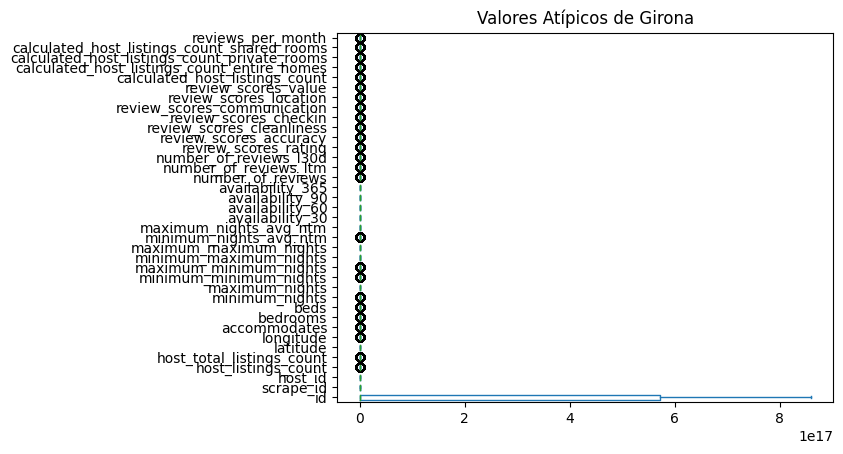

In [49]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
esp2.plot(kind='box', vert=False)
plt.title("Valores Atípicos de Girona")
plt.show() #dibujamos el diagrama

In [50]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=esp2
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

<ipython-input-50-0f45154c1fe6>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-50-0f45154c1fe6>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()


Limite superior permitido id                                              1.145731e+18
scrape_id                                       2.023030e+13
host_id                                         5.776010e+08
host_listings_count                             5.024385e+02
host_total_listings_count                       1.304143e+03
latitude                                        4.269221e+01
longitude                                       3.796862e+00
accommodates                                    1.357642e+01
bedrooms                                        6.642892e+00
beds                                            1.131747e+01
minimum_nights                                  6.165308e+01
maximum_nights                                  2.126503e+03
minimum_minimum_nights                          3.376590e+01
maximum_minimum_nights                          8.979748e+01
minimum_maximum_nights                          2.150761e+03
maximum_maximum_nights                          2.153433e+0

<ipython-input-50-0f45154c1fe6>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Inferior= y.mean() - 3*y.std()
<ipython-input-50-0f45154c1fe6>:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Inferior= y.mean() - 3*y.std()


In [51]:
#Encontramos Ouliers del Dataframe
outliers= esp2[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

<ipython-input-51-ddf86a17ae30>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers= esp2[(y>Limite_Superior)|(y<Limite_Inferior)]


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#Eliminamos columnas innecesarias
esp3= esp2.drop(['id'], axis=1)
esp3

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/14551,2.023030e+13,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,57237,https://www.airbnb.com/users/show/57237,...,4.91,4.63,4.74,HUTG-049542,f,1,0,1,0,0.37
1,https://www.airbnb.com/rooms/1205757,2.023030e+13,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,6586355,https://www.airbnb.com/users/show/6586355,...,4.91,4.69,4.80,Sin registro,f,1,0,1,0,0.51
2,https://www.airbnb.com/rooms/1212820,2.023030e+13,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,Sin registro,https://a0.muscache.com/pictures/18245529/0886...,6620645,https://www.airbnb.com/users/show/6620645,...,4.76,4.74,4.32,Sin registro,f,2,2,0,0,0.62
3,https://www.airbnb.com/rooms/751638,2.023030e+13,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,3680160,https://www.airbnb.com/users/show/3680160,...,5.00,4.63,4.50,PG000794,t,6,1,5,0,0.08
4,https://www.airbnb.com/rooms/41342,2.023030e+13,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,180072,https://www.airbnb.com/users/show/180072,...,4.73,4.91,4.36,HUTG-003688,f,1,1,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,https://www.airbnb.com/rooms/858386613168601750,2.023030e+13,01/04/2023,city scrape,"Casa La Chumbera, Begur, Costa Brava",Individual house located at the urbanization '...,Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,26281633,https://www.airbnb.com/users/show/26281633,...,4.70,4.70,4.40,HUTG-001292,t,34,34,0,0,0.50
19651,https://www.airbnb.com/rooms/858396134121337855,2.023030e+13,01/04/2023,city scrape,Playa a 2 minutos,"MagnÃ­fico piso para pasar vacaciones,dispone ...",Sin registro,https://a0.muscache.com/pictures/6351279f-294b...,444428600,https://www.airbnb.com/users/show/444428600,...,4.70,4.70,4.40,HUTG019727,t,1,1,0,0,0.50
19652,https://www.airbnb.com/rooms/858410917126332945,2.023030e+13,01/04/2023,city scrape,Apartamento cÃ©ntrico,"EstÃ¡ compuesto de dos habitaciones, una de ma...",Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,491503593,https://www.airbnb.com/users/show/491503593,...,4.70,4.70,4.40,HUTG-057830,f,9,9,0,0,0.50
19653,https://www.airbnb.com/rooms/858418062773719271,2.023030e+13,01/04/2023,city scrape,"Apto a 5 min de la playa, Platja d'Aro",Cozy apartment for 4 people. Perfect to spend ...,Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,389605038,https://www.airbnb.com/users/show/389605038,...,4.70,4.70,4.40,HUTG-065236,t,54,54,0,0,0.50


In [53]:
#Corroboramos valores nulos del dataframe4
valores_nulos=esp3.isnull().sum()
valores_nulos

listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 74, dtype: int64

In [54]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=esp3.copy()
data_clean=data_clean.fillna(round(esp3.mean(),1))
data_clean

<ipython-input-54-d5b66d6d6c0b>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_clean=data_clean.fillna(round(esp3.mean(),1))


,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/14551,2.023030e+13,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,57237,https://www.airbnb.com/users/show/57237,...,4.91,4.63,4.74,HUTG-049542,f,1,0,1,0,0.37
1,https://www.airbnb.com/rooms/1205757,2.023030e+13,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,6586355,https://www.airbnb.com/users/show/6586355,...,4.91,4.69,4.80,Sin registro,f,1,0,1,0,0.51
2,https://www.airbnb.com/rooms/1212820,2.023030e+13,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,Sin registro,https://a0.muscache.com/pictures/18245529/0886...,6620645,https://www.airbnb.com/users/show/6620645,...,4.76,4.74,4.32,Sin registro,f,2,2,0,0,0.62
3,https://www.airbnb.com/rooms/751638,2.023030e+13,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,3680160,https://www.airbnb.com/users/show/3680160,...,5.00,4.63,4.50,PG000794,t,6,1,5,0,0.08
4,https://www.airbnb.com/rooms/41342,2.023030e+13,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,180072,https://www.airbnb.com/users/show/180072,...,4.73,4.91,4.36,HUTG-003688,f,1,1,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,https://www.airbnb.com/rooms/858386613168601750,2.023030e+13,01/04/2023,city scrape,"Casa La Chumbera, Begur, Costa Brava",Individual house located at the urbanization '...,Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,26281633,https://www.airbnb.com/users/show/26281633,...,4.70,4.70,4.40,HUTG-001292,t,34,34,0,0,0.50
19651,https://www.airbnb.com/rooms/858396134121337855,2.023030e+13,01/04/2023,city scrape,Playa a 2 minutos,"MagnÃ­fico piso para pasar vacaciones,dispone ...",Sin registro,https://a0.muscache.com/pictures/6351279f-294b...,444428600,https://www.airbnb.com/users/show/444428600,...,4.70,4.70,4.40,HUTG019727,t,1,1,0,0,0.50
19652,https://www.airbnb.com/rooms/858410917126332945,2.023030e+13,01/04/2023,city scrape,Apartamento cÃ©ntrico,"EstÃ¡ compuesto de dos habitaciones, una de ma...",Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,491503593,https://www.airbnb.com/users/show/491503593,...,4.70,4.70,4.40,HUTG-057830,f,9,9,0,0,0.50
19653,https://www.airbnb.com/rooms/858418062773719271,2.023030e+13,01/04/2023,city scrape,"Apto a 5 min de la playa, Platja d'Aro",Cozy apartment for 4 people. Perfect to spend ...,Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,389605038,https://www.airbnb.com/users/show/389605038,...,4.70,4.70,4.40,HUTG-065236,t,54,54,0,0,0.50


In [55]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 74, dtype: int64

In [56]:
from google.colab import files
data_clean.to_csv("Girona-limpio.csv")

# ETAPA 2: Extracción  de DATOS

In [57]:
data_clean["host_acceptance_rate"]=data_clean["host_acceptance_rate"].replace({"%":" "},regex=False)

In [58]:
#a) host_acceptance_rate> 50%
filtro1=data_clean[data_clean["host_acceptance_rate"] > "50"]
filtro1

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/14551,2.023030e+13,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,57237,https://www.airbnb.com/users/show/57237,...,4.91,4.63,4.74,HUTG-049542,f,1,0,1,0,0.37
2,https://www.airbnb.com/rooms/1212820,2.023030e+13,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,Sin registro,https://a0.muscache.com/pictures/18245529/0886...,6620645,https://www.airbnb.com/users/show/6620645,...,4.76,4.74,4.32,Sin registro,f,2,2,0,0,0.62
3,https://www.airbnb.com/rooms/751638,2.023030e+13,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,3680160,https://www.airbnb.com/users/show/3680160,...,5.00,4.63,4.50,PG000794,t,6,1,5,0,0.08
7,https://www.airbnb.com/rooms/1215790,2.023030e+13,01/04/2023,city scrape,"100m FROM THE BEACH, with TERRACE","Big apartment with terrace (7 people), next to...",Sin registro,https://a0.muscache.com/pictures/ea54a005-62f2...,3149645,https://www.airbnb.com/users/show/3149645,...,5.00,4.56,4.11,HUTG-017955,f,1,1,0,0,0.08
9,https://www.airbnb.com/rooms/1222762,2.023030e+13,31/03/2023,city scrape,house in a quiet village,Enjoy this spacious house in a quiet village o...,Sin registro,https://a0.muscache.com/pictures/18516841/e9fe...,6404885,https://www.airbnb.com/users/show/6404885,...,5.00,4.63,4.63,HUTG-012585,f,1,1,0,0,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19647,https://www.airbnb.com/rooms/858355485916277793,2.023030e+13,01/04/2023,city scrape,"Port Pals: First sea line, apartment with comm...",Beautiful apartment on the seafront with views...,Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,497533696,https://www.airbnb.com/users/show/497533696,...,4.70,4.70,4.40,HUTG-037880,t,24,24,0,0,0.50
19649,https://www.airbnb.com/rooms/858379461423372661,2.023030e+13,01/04/2023,city scrape,Casa en segunda linea de mar,Tu familia lo tendrÃ¡ todo a un paso en este a...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,507731324,https://www.airbnb.com/users/show/507731324,...,4.70,4.70,4.40,Exempt,t,1,1,0,0,0.50
19652,https://www.airbnb.com/rooms/858410917126332945,2.023030e+13,01/04/2023,city scrape,Apartamento cÃ©ntrico,"EstÃ¡ compuesto de dos habitaciones, una de ma...",Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,491503593,https://www.airbnb.com/users/show/491503593,...,4.70,4.70,4.40,HUTG-057830,f,9,9,0,0,0.50
19653,https://www.airbnb.com/rooms/858418062773719271,2.023030e+13,01/04/2023,city scrape,"Apto a 5 min de la playa, Platja d'Aro",Cozy apartment for 4 people. Perfect to spend ...,Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,389605038,https://www.airbnb.com/users/show/389605038,...,4.70,4.70,4.40,HUTG-065236,t,54,54,0,0,0.50


In [59]:
#Sólo los registros con categoría “superhost”
filtro2=data_clean[data_clean["host_is_superhost"] == "t"]
filtro2

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/14551,2.023030e+13,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,57237,https://www.airbnb.com/users/show/57237,...,4.91,4.63,4.74,HUTG-049542,f,1,0,1,0,0.37
8,https://www.airbnb.com/rooms/45400,2.023030e+13,01/04/2023,city scrape,Begur - Loft - Costa Brava - SPAIN,<b>The space</b><br />Flat / Apartment. New. P...,Sin registro,https://a0.muscache.com/pictures/2206667/ea3bd...,201228,https://www.airbnb.com/users/show/201228,...,4.94,4.89,4.70,HUTG-015895,t,1,1,0,0,2.50
10,https://www.airbnb.com/rooms/753604,2.023030e+13,01/04/2023,city scrape,"""La Talaia"" Holiday House-BBQ-WiFi-Pool",La Talaia is the perfect choice if you want a ...,Lloret de Mar is a Spanish municipality in the...,https://a0.muscache.com/pictures/12094143/5f9f...,3964191,https://www.airbnb.com/users/show/3964191,...,4.98,4.81,4.80,LLG-000010,f,6,6,0,0,0.72
21,https://www.airbnb.com/rooms/106704,2.023030e+13,01/04/2023,city scrape,Casa rural cerca de la playa,<b>The space</b><br />The Loreto is a renovate...,Sin registro,https://a0.muscache.com/pictures/c6e996d0-e3dd...,553059,https://www.airbnb.com/users/show/553059,...,4.80,4.40,4.36,PG-002599,f,5,5,0,0,0.18
23,https://www.airbnb.com/rooms/766763,2.023030e+13,01/04/2023,city scrape,Modern Villa with spectacular view and a pool,"Villa d'architecte, avec vues sur la mer. Situ...",Sin registro,https://a0.muscache.com/pictures/4d19ece6-4554...,4043268,https://www.airbnb.com/users/show/4043268,...,4.90,5.00,4.76,HUTG-043628,f,2,2,0,0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19597,https://www.airbnb.com/rooms/857005842548581951,2.023030e+13,01/04/2023,city scrape,font vella - cozy apartment in the centre of c...,Refurbished duplex apartment located in a pede...,Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,137859766,https://www.airbnb.com/users/show/137859766,...,4.70,4.70,4.40,HUTG-060488,t,14,14,0,0,0.50
19601,https://www.airbnb.com/rooms/856170558033465178,2.023030e+13,01/04/2023,city scrape,Apartamento 2D a pie de playa en Estartit.,A primera lÃ­nea de mar y con unas puestas de ...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,401533317,https://www.airbnb.com/users/show/401533317,...,4.70,4.70,4.40,HUTG-059959,f,3,3,0,0,0.50
19617,https://www.airbnb.com/rooms/857140341578381773,2.023030e+13,31/03/2023,city scrape,Espectacular bajo con terraza,Este alojamiento tiene una ubicaciÃ³n estratÃ©...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,225125698,https://www.airbnb.com/users/show/225125698,...,4.70,4.70,4.40,HUTG-060928,t,4,4,0,0,0.50
19628,https://www.airbnb.com/rooms/857696993901267131,2.023030e+13,01/04/2023,city scrape,"Mamour, comodo y familiar","The Mamour apartment is ideal for families, it...",Mamour is an apartment that is located in the ...,https://a0.muscache.com/pictures/prohost-api/H...,125660503,https://www.airbnb.com/users/show/125660503,...,4.70,4.70,4.40,HUTG-067564,t,10,9,1,0,0.50


In [60]:
#Los registros que no hallan verificado identidad “ not identity_verified”
filtro3=data_clean[data_clean["host_identity_verified"] == "f"]
filtro3

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,https://www.airbnb.com/rooms/1212820,2.023030e+13,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,Sin registro,https://a0.muscache.com/pictures/18245529/0886...,6620645,https://www.airbnb.com/users/show/6620645,...,4.76,4.74,4.32,Sin registro,f,2,2,0,0,0.62
7,https://www.airbnb.com/rooms/1215790,2.023030e+13,01/04/2023,city scrape,"100m FROM THE BEACH, with TERRACE","Big apartment with terrace (7 people), next to...",Sin registro,https://a0.muscache.com/pictures/ea54a005-62f2...,3149645,https://www.airbnb.com/users/show/3149645,...,5.00,4.56,4.11,HUTG-017955,f,1,1,0,0,0.08
9,https://www.airbnb.com/rooms/1222762,2.023030e+13,31/03/2023,city scrape,house in a quiet village,Enjoy this spacious house in a quiet village o...,Sin registro,https://a0.muscache.com/pictures/18516841/e9fe...,6404885,https://www.airbnb.com/users/show/6404885,...,5.00,4.63,4.63,HUTG-012585,f,1,1,0,0,0.07
30,https://www.airbnb.com/rooms/784892,2.023030e+13,31/03/2023,city scrape,La Cerdanya. Queixans,TEMPORARY RENTAL<br /><br />JULY 1st TO AUGUST...,La casa se encuentra en el centro del pueblo. ...,https://a0.muscache.com/pictures/43708349/76d7...,4073860,https://www.airbnb.com/users/show/4073860,...,4.70,4.70,4.40,Sin registro,f,1,1,0,0,0.01
33,https://www.airbnb.com/rooms/1242933,2.023030e+13,01/04/2023,city scrape,PALAMOS HOUSE(Near beach La Fosca) HUTG-019098,<b>The space</b><br />House in the old town of...,Sin registro,https://a0.muscache.com/pictures/22760131/c3de...,6774688,https://www.airbnb.com/users/show/6774688,...,4.91,4.56,4.72,HUTG-019098,f,1,1,0,0,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19553,https://www.airbnb.com/rooms/856453392873929103,2.023030e+13,01/04/2023,city scrape,Apartamento para familia,Apartamento segunda planta a diez minutos cami...,"Platja d'Aro es, junto a Castell d'Aro y S'Aga...",https://a0.muscache.com/pictures/miso/Hosting-...,5113430,https://www.airbnb.com/users/show/5113430,...,4.70,4.70,4.40,HUTG-029538,f,3,3,0,0,0.50
19560,https://www.airbnb.com/rooms/855549250338882404,2.023030e+13,01/04/2023,city scrape,Casa near Santa Cristina beach,The house is located in a quit private area ne...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,167394031,https://www.airbnb.com/users/show/167394031,...,4.70,4.70,4.40,HUTG002307,t,1,1,0,0,0.50
19561,https://www.airbnb.com/rooms/856489549604868072,2.023030e+13,01/04/2023,city scrape,"Apartment with balcony, parking, Roses center",Holiday apartment about 5 minutes from the bea...,Right in the center of Roses with the comfort ...,https://a0.muscache.com/pictures/prohost-api/H...,450603533,https://www.airbnb.com/users/show/450603533,...,4.70,4.70,4.40,HUTG-023155,t,25,25,0,0,0.50
19611,https://www.airbnb.com/rooms/857116415296321804,2.023030e+13,01/04/2023,city scrape,Pleasant 3-bedroom ground floor with large ter...,<b>The space</b><br />Ground floor flat with a...,Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,503009347,https://www.airbnb.com/users/show/503009347,...,4.70,4.70,4.40,HUTG-008448,t,14,14,0,0,0.50


In [61]:
 #Los registro cuyo property_type = “Private room” y “Hotel room”
filtro4=data_clean[(data_clean["property_type"] == "Private room") | (data_clean["property_type"] == "Hotel room")]
filtro4.head(6)

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
356,https://www.airbnb.com/rooms/3054347,2.023030e+13,01/04/2023,city scrape,PequeÃ±o estudio con vistas al mar.,PequeÃ±o estudio situado en el casco antiguo e...,Tiene una muy buena ubicaciÃ²n ya que se encue...,https://a0.muscache.com/pictures/9bf9b7ee-092b...,15550598,https://www.airbnb.com/users/show/15550598,...,4.92,4.98,4.82,HUTG-002595,f,2,1,1,0,2.73
2484,https://www.airbnb.com/rooms/14613107,2.023030e+13,01/04/2023,previous scrape,HabitaciÃ³n con increible terraza y desayuno!,Lugares de interÃ©s: HabitaciÃ³n con increÃ¯bl...,Sin registro,https://a0.muscache.com/pictures/2fd05b2c-c902...,38817324,https://www.airbnb.com/users/show/38817324,...,4.83,4.80,4.88,Sin registro,f,1,0,1,0,0.52
3134,https://www.airbnb.com/rooms/17117682,2.023030e+13,31/03/2023,city scrape,HabitaciÃ³n Mosso Felitu (2-3 personas),Can Pere Petit estÃ¡ dividida en varios alojam...,Sin registro,https://a0.muscache.com/pictures/82e3f708-2017...,104655629,https://www.airbnb.com/users/show/104655629,...,4.77,4.85,4.62,ATG-000023,f,10,9,1,0,0.19
7838,https://www.airbnb.com/rooms/32997174,2.023030e+13,31/03/2023,city scrape,"VEN DE VACACIONES CON TU CABALLO, O SIN CABALLO",Habitacion con cama de matrimonio y colchon de...,Buena comunicaciÃ³n cerca de la autopista AP-7...,https://a0.muscache.com/pictures/c851d6c6-3dc3...,248354355,https://www.airbnb.com/users/show/248354355,...,4.83,4.50,4.61,Exempt,f,1,0,1,0,0.56
16665,https://www.airbnb.com/rooms/658304684608776381,2.023030e+13,01/04/2023,city scrape,"precioso atico con vistas,barbacoa ,terraza",EnamÃ³rate de este alojamiento tan romÃ¡ntico ...,Sin registro,https://a0.muscache.com/pictures/c3cb8d10-b578...,466301894,https://www.airbnb.com/users/show/466301894,...,5.00,4.00,5.00,HUTB-123456,t,1,0,1,0,0.23
17057,https://www.airbnb.com/rooms/686737674628035786,2.023030e+13,31/03/2023,city scrape,Landhaus mit Garten und Pool,Es handelt sich um ein groÃzÃ¼giges Zimmer mi...,"Viel GrÃ¼n, viele Felder, viel Wald, wir haben...",https://a0.muscache.com/pictures/miso/Hosting-...,104927492,https://www.airbnb.com/users/show/104927492,...,4.70,4.70,4.40,Exempt,f,1,0,1,0,0.50


In [62]:
#Los registros que cuenten con bathroom > 1
filtro5=data_clean[data_clean["bathrooms_text"] > "1"]
filtro5

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/14551,2.023030e+13,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,57237,https://www.airbnb.com/users/show/57237,...,4.91,4.63,4.74,HUTG-049542,f,1,0,1,0,0.37
1,https://www.airbnb.com/rooms/1205757,2.023030e+13,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,6586355,https://www.airbnb.com/users/show/6586355,...,4.91,4.69,4.80,Sin registro,f,1,0,1,0,0.51
2,https://www.airbnb.com/rooms/1212820,2.023030e+13,01/04/2023,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,Sin registro,https://a0.muscache.com/pictures/18245529/0886...,6620645,https://www.airbnb.com/users/show/6620645,...,4.76,4.74,4.32,Sin registro,f,2,2,0,0,0.62
3,https://www.airbnb.com/rooms/751638,2.023030e+13,31/03/2023,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,3680160,https://www.airbnb.com/users/show/3680160,...,5.00,4.63,4.50,PG000794,t,6,1,5,0,0.08
4,https://www.airbnb.com/rooms/41342,2.023030e+13,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,180072,https://www.airbnb.com/users/show/180072,...,4.73,4.91,4.36,HUTG-003688,f,1,1,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,https://www.airbnb.com/rooms/858386613168601750,2.023030e+13,01/04/2023,city scrape,"Casa La Chumbera, Begur, Costa Brava",Individual house located at the urbanization '...,Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,26281633,https://www.airbnb.com/users/show/26281633,...,4.70,4.70,4.40,HUTG-001292,t,34,34,0,0,0.50
19651,https://www.airbnb.com/rooms/858396134121337855,2.023030e+13,01/04/2023,city scrape,Playa a 2 minutos,"MagnÃ­fico piso para pasar vacaciones,dispone ...",Sin registro,https://a0.muscache.com/pictures/6351279f-294b...,444428600,https://www.airbnb.com/users/show/444428600,...,4.70,4.70,4.40,HUTG019727,t,1,1,0,0,0.50
19652,https://www.airbnb.com/rooms/858410917126332945,2.023030e+13,01/04/2023,city scrape,Apartamento cÃ©ntrico,"EstÃ¡ compuesto de dos habitaciones, una de ma...",Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,491503593,https://www.airbnb.com/users/show/491503593,...,4.70,4.70,4.40,HUTG-057830,f,9,9,0,0,0.50
19653,https://www.airbnb.com/rooms/858418062773719271,2.023030e+13,01/04/2023,city scrape,"Apto a 5 min de la playa, Platja d'Aro",Cozy apartment for 4 people. Perfect to spend ...,Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,389605038,https://www.airbnb.com/users/show/389605038,...,4.70,4.70,4.40,HUTG-065236,t,54,54,0,0,0.50


In [63]:
#Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”
filtro6=data_clean[(data_clean["price"] > "10000") & (data_clean["room_type"] == "Entire home")]
filtro6

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [64]:
#Los registros cuyo review_scores_cleanliness > 4.5
filtro7=data_clean[data_clean["review_scores_cleanliness"] > 4.5]
filtro7

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/14551,2.023030e+13,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,57237,https://www.airbnb.com/users/show/57237,...,4.91,4.63,4.74,HUTG-049542,f,1,0,1,0,0.37
1,https://www.airbnb.com/rooms/1205757,2.023030e+13,31/03/2023,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,6586355,https://www.airbnb.com/users/show/6586355,...,4.91,4.69,4.80,Sin registro,f,1,0,1,0,0.51
4,https://www.airbnb.com/rooms/41342,2.023030e+13,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,180072,https://www.airbnb.com/users/show/180072,...,4.73,4.91,4.36,HUTG-003688,f,1,1,0,0,0.09
5,https://www.airbnb.com/rooms/751997,2.023030e+13,01/04/2023,city scrape,CAN FELIP - Ãtico loft del s.XVIII,"MagnÃ­fica casa de pueblo del siglo XVIII, ubi...",Palafrugell se remonta al siglo X. El nÃºcleo ...,https://a0.muscache.com/pictures/f50b37b3-1c4d...,3387407,https://www.airbnb.com/users/show/3387407,...,4.45,4.79,4.59,HUTG-016218,t,12,12,0,0,0.34
6,https://www.airbnb.com/rooms/752035,2.023030e+13,31/03/2023,city scrape,CAN TARONGETA - Soleado Apto. 1-1,MagnÃ­fico Apartamento de 62mÂ² con 2 dormitor...,Palafrugell se remonta al siglo X. El nÃºcleo ...,https://a0.muscache.com/pictures/303024e1-2deb...,3387407,https://www.airbnb.com/users/show/3387407,...,4.50,4.50,4.36,HUTG-008974,f,12,12,0,0,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18961,https://www.airbnb.com/rooms/832730851661936958,2.023030e+13,31/03/2023,city scrape,"Casa ""Nice Nature,"" Comodidad, diseÃ±o y natur...","Bienvenid@ a ""Nice Nature"" una fantÃ¡stica cas...",La casa se encuentra en el barrio residencial ...,https://a0.muscache.com/pictures/miso/Hosting-...,42298166,https://www.airbnb.com/users/show/42298166,...,5.00,5.00,5.00,HUTG-066752,t,1,1,0,0,3.00
19001,https://www.airbnb.com/rooms/841059517747063321,2.023030e+13,01/04/2023,city scrape,Tossa Center Attic & Terrace,El Tossa Center Attic & Terrace ofrece vistas ...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,192741333,https://www.airbnb.com/users/show/192741333,...,5.00,5.00,5.00,HUTG-048774,t,1,1,0,0,1.00
19046,https://www.airbnb.com/rooms/841674432208362342,2.023030e+13,01/04/2023,city scrape,Apartamento en la Costa Brava,Disfruta de la comodidad de este alojamiento y...,Sin registro,https://a0.muscache.com/pictures/9a47d0a8-6d95...,253595964,https://www.airbnb.com/users/show/253595964,...,5.00,5.00,5.00,Exempt,t,2,1,1,0,1.00
19077,https://www.airbnb.com/rooms/841995834617979068,2.023030e+13,01/04/2023,city scrape,HabitaciÃ³n doble Empuriabrava,"En la casa vivimos mi pareja y yo, el es AlemÃ...",Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,38726312,https://www.airbnb.com/users/show/38726312,...,5.00,5.00,5.00,HUTG-047773,f,2,0,2,0,1.00


In [65]:
#Los registros cuyo review_scores_value > 4.9
filtro8=data_clean[data_clean["review_scores_value"] > 4.9]
filtro8

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
22,https://www.airbnb.com/rooms/1234785,2.023030e+13,01/04/2023,city scrape,"Begur, house w/garden & pool, view to sea & ca...","200sqm house with garage, private garden and s...",Close to Begur you'll be free to choose betwee...,https://a0.muscache.com/pictures/111fefa4-3f14...,6732502,https://www.airbnb.com/users/show/6732502,...,5.0,5.0,5.00,HUTG-026895,f,2,1,1,0,0.10
26,https://www.airbnb.com/rooms/774371,2.023030e+13,01/04/2023,city scrape,ÃTICO DUPLEX a 20 metros de la playa,<b>The space</b><br />Ãtico duplex a 20 metro...,Sin registro,https://a0.muscache.com/pictures/10827710/ad10...,4085536,https://www.airbnb.com/users/show/4085536,...,5.0,5.0,4.92,HUTG-014853,f,2,1,1,0,0.34
40,https://www.airbnb.com/rooms/1250062,2.023030e+13,01/04/2023,city scrape,HOLIDAY HOUSE WITH POOL ANELL ARO,<b>The space</b><br />Townhouse in gated commu...,Sin registro,https://a0.muscache.com/pictures/18834812/bf22...,6811852,https://www.airbnb.com/users/show/6811852,...,5.0,5.0,5.00,HUTG-025234,f,1,1,0,0,0.15
43,https://www.airbnb.com/rooms/809136,2.023030e+13,31/03/2023,city scrape,Costabravaforrent Segalar 9,"Apartment in the village of Albons, Costa Brav...",Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,4208003,https://www.airbnb.com/users/show/4208003,...,5.0,4.2,5.00,HUTG-001370,t,34,34,0,0,0.05
53,https://www.airbnb.com/rooms/1262051,2.023030e+13,31/03/2023,city scrape,apartment with countryside views,Open plan apartment. Part of a restored Catala...,"In the village up the track, you'll find a gro...",https://a0.muscache.com/pictures/19020294/914c...,6595329,https://www.airbnb.com/users/show/6595329,...,5.0,5.0,5.00,ATG-000053,f,7,5,2,0,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19038,https://www.airbnb.com/rooms/841316614411176358,2.023030e+13,31/03/2023,city scrape,Studio Ã La Molina,"Our 40 m2 studio in the Residence Maresme Neu,...","A 500 mÃ¨tres de la gare de La Molina, qui des...",https://a0.muscache.com/pictures/miso/Hosting-...,232395755,https://www.airbnb.com/users/show/232395755,...,5.0,4.0,5.00,HUTG-063362,f,1,1,0,0,1.00
19046,https://www.airbnb.com/rooms/841674432208362342,2.023030e+13,01/04/2023,city scrape,Apartamento en la Costa Brava,Disfruta de la comodidad de este alojamiento y...,Sin registro,https://a0.muscache.com/pictures/9a47d0a8-6d95...,253595964,https://www.airbnb.com/users/show/253595964,...,5.0,5.0,5.00,Exempt,t,2,1,1,0,1.00
19077,https://www.airbnb.com/rooms/841995834617979068,2.023030e+13,01/04/2023,city scrape,HabitaciÃ³n doble Empuriabrava,"En la casa vivimos mi pareja y yo, el es AlemÃ...",Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,38726312,https://www.airbnb.com/users/show/38726312,...,5.0,5.0,5.00,HUTG-047773,f,2,0,2,0,1.00
19202,https://www.airbnb.com/rooms/842711402238569326,2.023030e+13,01/04/2023,city scrape,Apartamento a 300m de la playa,El piso se encuentra a 300m de la playa de Emp...,"Es una zona muy tranquila, con muchÃ­simo apar...",https://a0.muscache.com/pictures/miso/Hosting-...,121671158,https://www.airbnb.com/users/show/121671158,...,5.0,5.0,5.00,HUTG-027175,f,1,1,0,0,3.00


In [66]:
#Los registros cuya availability_365< 100
filtro9=data_clean[data_clean["availability_365"] < 100]
filtro9

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4,https://www.airbnb.com/rooms/41342,2.023030e+13,01/04/2023,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,180072,https://www.airbnb.com/users/show/180072,...,4.73,4.91,4.36,HUTG-003688,f,1,1,0,0,0.09
7,https://www.airbnb.com/rooms/1215790,2.023030e+13,01/04/2023,city scrape,"100m FROM THE BEACH, with TERRACE","Big apartment with terrace (7 people), next to...",Sin registro,https://a0.muscache.com/pictures/ea54a005-62f2...,3149645,https://www.airbnb.com/users/show/3149645,...,5.00,4.56,4.11,HUTG-017955,f,1,1,0,0,0.08
11,https://www.airbnb.com/rooms/48764,2.023030e+13,31/03/2023,city scrape,18th C Stone House near Costa Brava,Casa Fluvia is a charming stone village house ...,Torroella de FluviÃ¡ is a small peaceful rural...,https://a0.muscache.com/pictures/19824290/9c7a...,220145,https://www.airbnb.com/users/show/220145,...,4.97,4.70,4.82,HUTG-000207,f,1,1,0,0,0.24
15,https://www.airbnb.com/rooms/93343,2.023030e+13,01/04/2023,city scrape,Alquiler de casa en La Costa Brava cerca de playa,Siguiendo con nuestra linea de alojamientos co...,Localizada a:<br />Playa : 700 m<br />Supermer...,https://a0.muscache.com/pictures/6656368/7038d...,477826,https://www.airbnb.com/users/show/477826,...,4.70,4.70,4.40,HUTG-001447,f,3,3,0,0,0.50
20,https://www.airbnb.com/rooms/1234784,2.023030e+13,01/04/2023,previous scrape,"Begur, belle chambre, vues mer & chÃ¢teau. Pis...",Casa pareada de dos plantas con jardÃ­n privad...,"A 400m del centro del pueblo de sus comercios,...",https://a0.muscache.com/pictures/18591001/c289...,6732502,https://www.airbnb.com/users/show/6732502,...,4.94,4.93,4.77,HUTG-026895,f,2,1,1,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19627,https://www.airbnb.com/rooms/857675856004912385,2.023030e+13,31/03/2023,city scrape,Costabravasi - Atica,"Spacious house with pool, air conditioning, wi...",Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,127955218,https://www.airbnb.com/users/show/127955218,...,4.70,4.70,4.40,HUTG-036943,t,79,79,0,0,0.50
19632,https://www.airbnb.com/rooms/857770414483633162,2.023030e+13,01/04/2023,city scrape,Sunrise - Shippable Apartment on the Bay,"Magic Sunrise seafront duplex just renovated, ...",Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,127955218,https://www.airbnb.com/users/show/127955218,...,4.70,4.70,4.40,HUTG-000001,t,79,79,0,0,0.50
19634,https://www.airbnb.com/rooms/857782451288614097,2.023030e+13,01/04/2023,city scrape,Fener de Baix 1 Apartment with sea views,Apartment with sea views<br /><br /><b>The spa...,Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,21668566,https://www.airbnb.com/users/show/21668566,...,4.70,4.70,4.40,HUTG-068543,t,64,64,0,0,0.50
19638,https://www.airbnb.com/rooms/857858073918571632,2.023030e+13,01/04/2023,city scrape,Casa con piscina privada y vista a la montaÃ±a,"Detached house ideal for 6 people, with privat...",The Mas Tomasi urbanization is located in Maso...,https://a0.muscache.com/pictures/miso/Hosting-...,461023346,https://www.airbnb.com/users/show/461023346,...,4.70,4.70,4.40,HUTG-006876,f,10,10,0,0,0.50


In [67]:
#Los registros cuya host_response_time sea “within an hour”
filtro10=data_clean[data_clean["host_response_time"] == "within an hour"]
filtro10

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/14551,2.023030e+13,31/03/2023,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,57237,https://www.airbnb.com/users/show/57237,...,4.91,4.63,4.74,HUTG-049542,f,1,0,1,0,0.37
5,https://www.airbnb.com/rooms/751997,2.023030e+13,01/04/2023,city scrape,CAN FELIP - Ãtico loft del s.XVIII,"MagnÃ­fica casa de pueblo del siglo XVIII, ubi...",Palafrugell se remonta al siglo X. El nÃºcleo ...,https://a0.muscache.com/pictures/f50b37b3-1c4d...,3387407,https://www.airbnb.com/users/show/3387407,...,4.45,4.79,4.59,HUTG-016218,t,12,12,0,0,0.34
6,https://www.airbnb.com/rooms/752035,2.023030e+13,31/03/2023,city scrape,CAN TARONGETA - Soleado Apto. 1-1,MagnÃ­fico Apartamento de 62mÂ² con 2 dormitor...,Palafrugell se remonta al siglo X. El nÃºcleo ...,https://a0.muscache.com/pictures/303024e1-2deb...,3387407,https://www.airbnb.com/users/show/3387407,...,4.50,4.50,4.36,HUTG-008974,f,12,12,0,0,0.13
8,https://www.airbnb.com/rooms/45400,2.023030e+13,01/04/2023,city scrape,Begur - Loft - Costa Brava - SPAIN,<b>The space</b><br />Flat / Apartment. New. P...,Sin registro,https://a0.muscache.com/pictures/2206667/ea3bd...,201228,https://www.airbnb.com/users/show/201228,...,4.94,4.89,4.70,HUTG-015895,t,1,1,0,0,2.50
10,https://www.airbnb.com/rooms/753604,2.023030e+13,01/04/2023,city scrape,"""La Talaia"" Holiday House-BBQ-WiFi-Pool",La Talaia is the perfect choice if you want a ...,Lloret de Mar is a Spanish municipality in the...,https://a0.muscache.com/pictures/12094143/5f9f...,3964191,https://www.airbnb.com/users/show/3964191,...,4.98,4.81,4.80,LLG-000010,f,6,6,0,0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19647,https://www.airbnb.com/rooms/858355485916277793,2.023030e+13,01/04/2023,city scrape,"Port Pals: First sea line, apartment with comm...",Beautiful apartment on the seafront with views...,Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,497533696,https://www.airbnb.com/users/show/497533696,...,4.70,4.70,4.40,HUTG-037880,t,24,24,0,0,0.50
19648,https://www.airbnb.com/rooms/858361225190866263,2.023030e+13,01/04/2023,city scrape,Pelegri Studio with Terrace in Tossa de Mar,Studio apartment with terrace in Tossa de Mar ...,Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,13308911,https://www.airbnb.com/users/show/13308911,...,4.70,4.70,4.40,HUTG-027601,t,50,50,0,0,0.50
19650,https://www.airbnb.com/rooms/858386613168601750,2.023030e+13,01/04/2023,city scrape,"Casa La Chumbera, Begur, Costa Brava",Individual house located at the urbanization '...,Sin registro,https://a0.muscache.com/pictures/prohost-api/H...,26281633,https://www.airbnb.com/users/show/26281633,...,4.70,4.70,4.40,HUTG-001292,t,34,34,0,0,0.50
19651,https://www.airbnb.com/rooms/858396134121337855,2.023030e+13,01/04/2023,city scrape,Playa a 2 minutos,"MagnÃ­fico piso para pasar vacaciones,dispone ...",Sin registro,https://a0.muscache.com/pictures/6351279f-294b...,444428600,https://www.airbnb.com/users/show/444428600,...,4.70,4.70,4.40,HUTG019727,t,1,1,0,0,0.50


In [68]:
#from google.colab import files
filtro1.to_csv("filtro1esp.csv")
filtro2.to_csv("filtro2esp.csv")
filtro3.to_csv("filtro3esp.csv")
filtro4.to_csv("filtro4esp.csv")
filtro5.to_csv("filtro5esp.csv")
filtro6.to_csv("filtro6esp.csv")
filtro7.to_csv("filtro7esp.csv")
filtro8.to_csv("filtro8esp.csv")
filtro9.to_csv("filtro9esp.csv")
filtro10.to_csv("filtro10esp.csv")